In [1]:
#The Basic
#library for linear algebra
import numpy as np
#library for dataframe manipulation
import pandas as pd
#to use matplotlib as a backend
%matplotlib inline   
#library for data visualization
import matplotlib.pyplot as plt

#Feature Engineering
#I will use feature scaling to improve my model, as a note standardScale will no working in nonParametric algorithms... I wanna see that
from sklearn.preprocessing import StandardScaler

#The algorithms
#First I wanna import the noEnsemble algorithms to prove
#Decision trees is a non-parametric algorithm, is said we dont need weights to adjust
from sklearn.tree import DecisionTreeClassifier
#LogisticRegression and SGD are parametric algorithms,  you need to train the weights
from sklearn.linear_model import LogisticRegression

#To Evaluate
#GridSerachCv search by best hyperparameters to use
from sklearn.model_selection import GridSearchCV
#I will use cross-val-score to evaluate the efficience of my model in a validation set
from sklearn.model_selection import cross_val_score

In [4]:
# The code was removed by Watson Studio for sharing.

In [ ]:
train_set = pd.read_csv("./train.csv")
test_set = pd.read_csv("./test.csv")

In [5]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


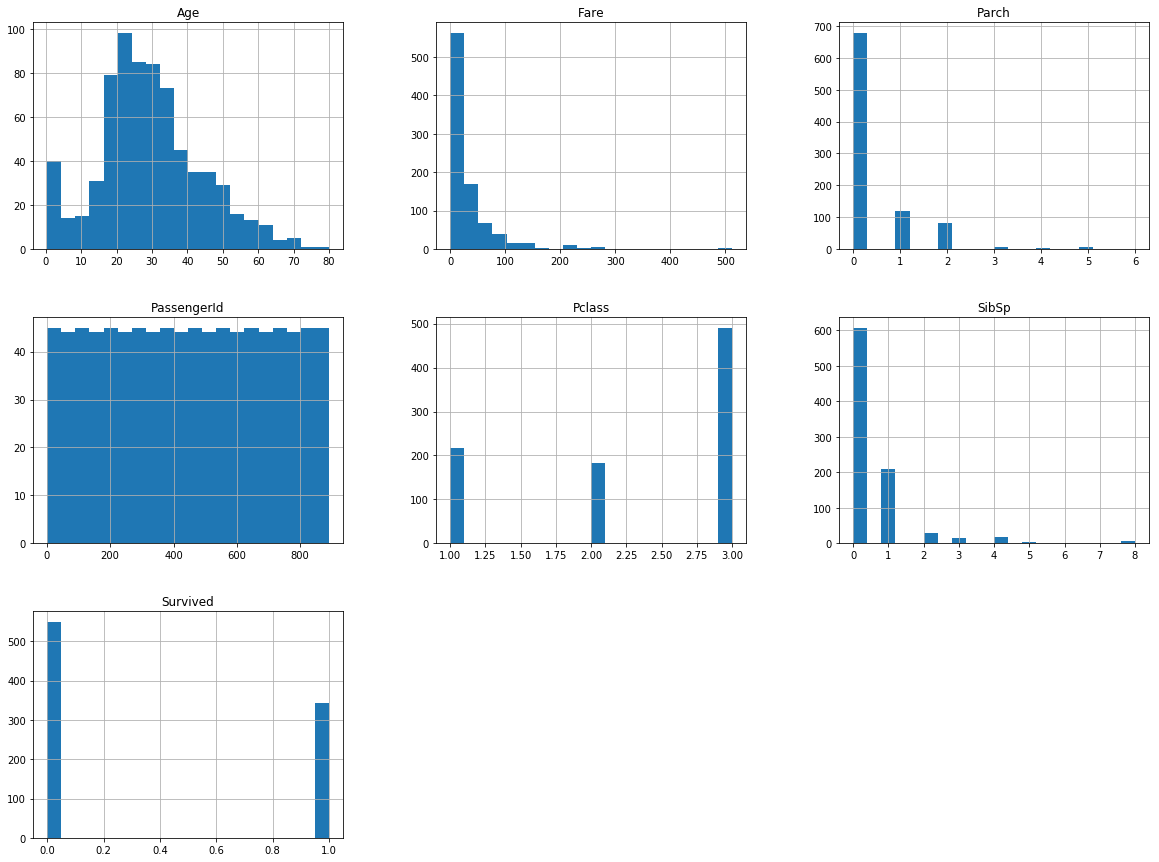

In [6]:
train_set.hist(bins=20, figsize=(20,15))
plt.show()

In [7]:
sex_survived = train_set.groupby(["Survived"])["Sex"].value_counts().unstack()
sex_survived

Sex,female,male
Survived,,
0,81,468
1,233,109


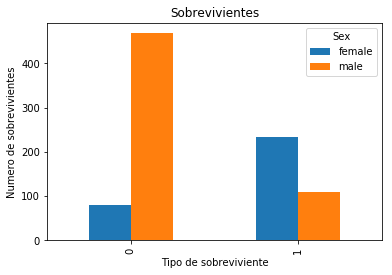

In [8]:
sex_survived.plot(kind="bar")
plt.xlabel('Tipo de sobreviviente')
plt.ylabel('Numero de sobrevivientes') 
plt.title('Sobrevivientes') 

plt.show()

In [9]:
pclass_survived = train_set.groupby(["Survived"])["Pclass"].value_counts().unstack()
pclass_survived

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


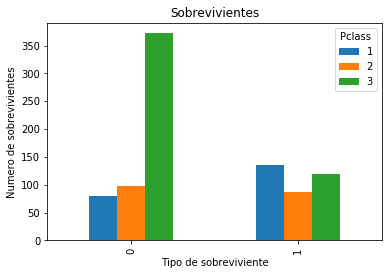

In [10]:
pclass_survived.plot(kind="bar")
plt.xlabel('Tipo de sobreviviente')
plt.ylabel('Numero de sobrevivientes') 
plt.title('Sobrevivientes') 

plt.show()

In [11]:
train_set.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [12]:
train_set["Age_v2"] = train_set["Age"].fillna(method="ffill")
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_v2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [13]:
train_set.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Age_v2         False
dtype: bool

In [14]:
train_set["Age_v3"] = pd.cut(train_set["Age_v2"], bins=[0, 12, 20, 60, 100], labels=["Niño", "Adolecente", "Adulto", "Anciano"])
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_v2,Age_v3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,Adulto
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,Adulto
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,Adulto
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,Adulto
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,Adulto


In [15]:
age_survived = train_set.groupby(["Survived"])["Age_v3"].value_counts().unstack()
age_survived

Age_v3,Adolecente,Adulto,Anciano,Niño
Survived,,,,
0,85,405,17,42
1,49,236,7,50


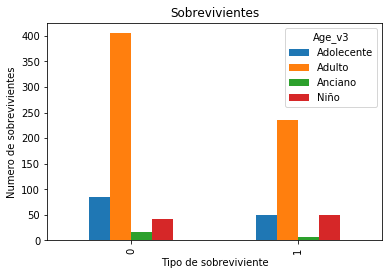

In [16]:
age_survived.plot(kind="bar")
plt.xlabel('Tipo de sobreviviente')
plt.ylabel('Numero de sobrevivientes') 
plt.title('Sobrevivientes') 

plt.show()

In [17]:
train_set.pivot_table("Survived", "Sex", "Pclass")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [18]:
sex_pclass = train_set.groupby(["Survived", "Pclass"])["Sex"].value_counts().unstack()
sex_pclass

Sex              female  male
Survived Pclass              
0        1            3    77
         2            6    91
         3           72   300
1        1           91    45
         2           70    17
         3           72    47

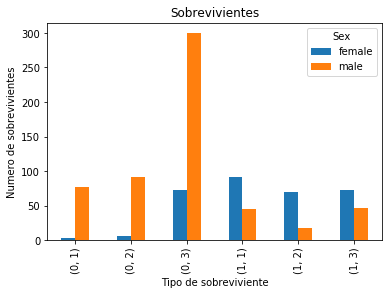

In [19]:
sex_pclass.plot(kind="bar")
plt.xlabel('Tipo de sobreviviente')
plt.ylabel('Numero de sobrevivientes') 
plt.title('Sobrevivientes') 

plt.show()

In [20]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_v2,Age_v3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,Adulto
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,Adulto
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,Adulto
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,Adulto
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,Adulto


In [21]:
Sex_ohe = pd.get_dummies(train_set["Sex"])
Sex_ohe.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [22]:
train_concat = pd.concat([train_set, Sex_ohe] , axis="columns")
train_concat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_v2,Age_v3,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,Adulto,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,Adulto,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,Adulto,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,Adulto,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,Adulto,0,1


In [23]:
train_X = train_concat.loc[:, ["Pclass", "Fare", "female", "male", "Age_v2", "SibSp", "Parch"]]
train_y = train_concat.loc[:, ["Survived"]]
train_X.head()

,Pclass,Fare,female,male,Age_v2,SibSp,Parch
0,3,7.2500,0,1,22.0,1,0
1,1,71.2833,1,0,38.0,1,0
2,3,7.9250,1,0,26.0,0,0
3,1,53.1000,1,0,35.0,1,0
4,3,8.0500,0,1,35.0,0,0


In [24]:
train_y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [25]:
scalerDT = StandardScaler()
X_train_scaler = scalerDT.fit_transform(train_X.astype(np.float64))

In [26]:
DTs_normal = DecisionTreeClassifier(random_state=123)
suma_normal = cross_val_score(DTs_normal, train_X, train_y, cv=3, scoring="accuracy")
print(np.mean(suma_normal))

0.758698092031


In [27]:
columnas = train_X.columns.tolist()
columnas

['Pclass', 'Fare', 'female', 'male', 'Age_v2', 'SibSp', 'Parch']

In [28]:
Jack = pd.DataFrame({"Pclass": [3], "Fare": [7.0000], "female": [0], "male": [1], "Age_v2": [20.0], "SibSp": [0], "Parch": [0]}) 
Jack

,Age_v2,Fare,Parch,Pclass,SibSp,female,male
0,20.0,7.0,0,3,0,0,1


In [29]:
DTs_normal.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [30]:
DTs_normal.predict(Jack)

array([0])

In [31]:
predicciones = DTs_normal.predict(train_X)
predicciones

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1,

In [32]:
train_X.head()

,Pclass,Fare,female,male,Age_v2,SibSp,Parch
0,3,7.2500,0,1,22.0,1,0
1,1,71.2833,1,0,38.0,1,0
2,3,7.9250,1,0,26.0,0,0
3,1,53.1000,1,0,35.0,1,0
4,3,8.0500,0,1,35.0,0,0
